In [3]:
import requests
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

### Web scraping is the process of excrating data from web page like filpkart 

In [63]:

# Initialize lists
title = []
brand = []
RAM = []
SSD = []
Processor = []
Operating_System = []
Processor_Gen = []

# Add headers to avoid being blocked by Flipkart
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0 Safari/537.36"
}

# Loop through multiple pages
for page_num in range(1, 31):  # use 3 pages first for testing
    url = f'https://www.flipkart.com/search?q=laptops&page={page_num}'
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

    # Extract all laptop titles
    all_titles = soup.find_all("div", class_="KzDlHZ")

    for item in all_titles:
        text = item.get_text(strip=True)
        title.append(text)

        # --- Brand ---
        regex = re.findall(r'^[A-Za-z]+', text)
        brand.append(regex[0] if regex else np.nan)

        # --- RAM ---
        regex = re.findall(r'\d+\s*GB(?=.*SSD)', text, re.IGNORECASE)
        RAM.append(regex[0] if regex else np.nan)

        # --- SSD ---
        regex = re.findall(r'\d{3,4}\s*GB|\d+\.?\d*\s*TB', text, re.IGNORECASE)
        SSD.append(regex[0] if regex else np.nan)

        # --- Processor ---
        regex = re.findall(r'(?:Intel|AMD|MediaTek)\s+(?:Core\s(?:i3|i5|i7|i9|Ultra\s\d)|Ryzen\s\d|Celeron|Pentium|Athlon|Kompanio)', text, re.IGNORECASE)
        Processor.append(regex[0] if regex else np.nan)

        # --- Operating System ---
        regex = re.findall(r'Windows\s\d+(?:\s\w+)*', text, re.IGNORECASE)
        Operating_System.append(regex[0] if regex else np.nan)

        # --- Processor Generation ---
        regex = re.findall(r'\d{1,2}(?:st|nd|rd|th)\sGen', text)
        Processor_Gen.append(regex[0] if regex else np.nan)

In [64]:
print(len(brand))
print(len(title))
print(len(RAM))
print(len(SSD))
print(len(Processor))
print(len(Operating_System ))
print(len(Processor_Gen))

720
720
720
720
720
720
720


In [65]:
price = []
for page_num in range(1, 31):  # use 3 pages first for testing
    url = f'https://www.flipkart.com/search?q=laptops&page={page_num}'
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    for i in soup.find_all("div",class_= "tUxRFH"):
        r = i.find("div",class_ = "Nx9bqj _4b5DiR")
        if r:
            price.append(r.text)
        else:
            price.append(np.nan)

In [66]:
print(len(price))

720


In [67]:
rating = []
for page_num in range(1, 31):  # use 3 pages first for testing
    url = f'https://www.flipkart.com/search?q=laptops&page={page_num}'
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

    for i in soup.find_all("div",class_= "tUxRFH"):
        r = i.find("div",class_ = "XQDdHH")
        if r:
            rating.append(r.text)
        else:
            rating.append(np.nan)
print(len(rating))

720


### After the web scraping Created a DataFrame of the scraped data

In [68]:
df = pd.DataFrame({
    'Brand': brand,
    'Processor': Processor,
    'Operating_System': Operating_System,
    'RAM(GB)': RAM,
    'SSD(GB/TB)': SSD,
    'Processor_Gen': Processor_Gen,
    'Price(₹)': price[:len(title)],
    'Rating': rating[:len(title)]
})

### DataFrame convert into to_csv file 

In [15]:
df.to_csv('EDA project.csv',index = False)

In [4]:
df = pd.read_csv('EDA project.csv')

In [5]:
df

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,NaN,16 GB,512 GB,NaN,"₹75,490",4.5
1,DELL,Intel Core i7,Windows 11 Ho,16 GB,512 GB,13th Gen,"₹65,990",4.3
2,Samsung,Intel Core Ultra 5,Windows 11 Home,16 GB,512 GB,NaN,"₹72,140",4.2
3,Acer,Intel Core i3,Windows 11 Home,16 GB,512 GB,13th Gen,"₹35,990",3.9
4,Acer,Intel Core i3,Windows 11 Home,8 GB,512 GB,12th Gen,"₹27,990",4.2
...,...,...,...,...,...,...,...,...
715,DELL,Intel Core i7,Windows 11 Home,16 GB,1 TB,13th Gen,"₹1,31,990",3.5
716,ASUS,Intel Core i3,Windows 11 Home,8 GB,512 GB,NaN,"₹30,990",3.2
717,HP,Intel Core i5,Windows 11 Home,8 GB,512 GB,12th Gen,"₹65,941",3.1
718,Samsung,Intel Core Ultra 5,NaN,16 GB,512 GB,NaN,"₹1,02,990",4.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Processor         659 non-null    object 
 2   Operating_System  536 non-null    object 
 3   RAM(GB)           616 non-null    object 
 4   SSD(GB/TB)        654 non-null    object 
 5   Processor_Gen     397 non-null    object 
 6   Price(₹)          720 non-null    object 
 7   Rating            692 non-null    float64
dtypes: float64(1), object(7)
memory usage: 45.1+ KB


### Data analysis and cleaning 

In [7]:
df['Operating_System'].value_counts()

Operating_System
Windows 11 Home    432
Windows 11 Pro      38
Windows 11 Ho       26
Windows 10 Home     12
Windows 11 H         8
Windows 1            7
Windows 11           5
Windows 11 Hom       5
Windows 11 P         1
Windows 11 Pr        1
Windows 10           1
Name: count, dtype: int64

In [8]:
df['Operating_System'] = df['Operating_System'].replace({
    'Windows 11 H': 'Windows 11 Home',
    'Windows 11 Ho': 'Windows 11 Home',
    'Windows 11 Hom':'Windows 11 Home',
    'Windows 11 P':'Windows 11 Pro',
    'Windows 11 Pr':'Windows 11 Pro',
    'Windows 11':'Windows 11 Pro',
    'Windows 1':'Windows 11 Pro'
    })

In [9]:
df['Operating_System'].value_counts()

Operating_System
Windows 11 Home    471
Windows 11 Pro      52
Windows 10 Home     12
Windows 10           1
Name: count, dtype: int64

In [10]:
df['Price(₹)'] = df['Price(₹)'].replace('[₹,]', '', regex=True).astype(object)
df['RAM(GB)'] = df['RAM(GB)'].str.replace('GB', '', regex=False).astype(object)
df['Processor_Gen'] = df['Processor_Gen'].str.replace('th Gen', '', regex=False).astype(object)
df['SSD(GB/TB)'] = (
    df['SSD(GB/TB)']
    .str.replace('GB', '', regex=False)
    .str.replace('TB', '000', regex=False)
    .astype(object)
    .astype(object)
)

In [11]:
df.dtypes

Brand                object
Processor            object
Operating_System     object
RAM(GB)              object
SSD(GB/TB)           object
Processor_Gen        object
Price(₹)             object
Rating              float64
dtype: object

In [12]:
df.head(10)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,NaN,16,512,NaN,75490,4.5
1,DELL,Intel Core i7,Windows 11 Home,16,512,13,65990,4.3
2,Samsung,Intel Core Ultra 5,Windows 11 Home,16,512,NaN,72140,4.2
3,Acer,Intel Core i3,Windows 11 Home,16,512,13,35990,3.9
4,Acer,Intel Core i3,Windows 11 Home,8,512,12,27990,4.2
5,DELL,Intel Core Ultra 7,NaN,16,512,NaN,112990,4.3
6,DELL,Intel Core i3,Windows 11 Home,8,512,13,32890,3.8
7,DELL,AMD Ryzen 5,Windows 11 Home,16,512,NaN,40990,4.4
8,Samsung,NaN,NaN,NaN,512,NaN,54990,4.3
9,Acer,Intel Celeron,Windows 11 Home,8,128,NaN,15990,4.4


In [13]:
df['SSD(GB/TB)'].value_counts()	

SSD(GB/TB)
512      511
1 000     80
256       43
128       18
500        1
2 000      1
Name: count, dtype: int64

In [14]:
df.shape

(720, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Processor         659 non-null    object 
 2   Operating_System  536 non-null    object 
 3   RAM(GB)           616 non-null    object 
 4   SSD(GB/TB)        654 non-null    object 
 5   Processor_Gen     397 non-null    object 
 6   Price(₹)          720 non-null    object 
 7   Rating            692 non-null    float64
dtypes: float64(1), object(7)
memory usage: 45.1+ KB


In [16]:
df.isna().sum()

Brand                 0
Processor            61
Operating_System    184
RAM(GB)             104
SSD(GB/TB)           66
Processor_Gen       323
Price(₹)              0
Rating               28
dtype: int64

In [17]:
df.duplicated().sum()

25

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# Processor missing values replace of values
df.loc[df['Processor'].isna() & (df['Brand'] == 'Apple'), 'Processor'] = 'Apple M-Series'
df['Processor'] = df['Processor'].fillna('unknown')

In [20]:
# Operating_System missing values replace
df.loc[(df['Brand'] == 'Apple') & (df['Operating_System'].isna()), 'Operating_System'] = 'macOS'
df['Operating_System'] = df['Operating_System'].fillna('Windows 11 Home')

In [21]:
df.head(3)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,Windows 11 Home,16,512,NaN,75490,4.5
1,DELL,Intel Core i7,Windows 11 Home,16,512,13,65990,4.3
2,Samsung,Intel Core Ultra 5,Windows 11 Home,16,512,NaN,72140,4.2


In [22]:
df['RAM(GB)'] = pd.to_numeric(df['RAM(GB)'],errors='coerce')
df['SSD(GB/TB)'] = pd.to_numeric(df['SSD(GB/TB)'], errors='coerce')
df['RAM(GB)'] = df['RAM(GB)'].fillna(df['RAM(GB)'].median())
df['SSD(GB/TB)']= df['SSD(GB/TB)'].fillna(df['SSD(GB/TB)'].median())

In [23]:
df['Processor_Gen'] = df['Processor_Gen'].astype('object')
df['Price(₹)'] = df['Price(₹)'].astype('float64')
df['Rating'] = df['Rating'].astype('float64')
df['Processor_Gen'].fillna(df['Processor_Gen'].mode()[0], inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df['Price(₹)'].fillna(df['Price(₹)'].median(), inplace = True)

C:\Users\areti\AppData\Local\Temp\ipykernel_14836\2004990761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processor_Gen'].fillna(df['Processor_Gen'].mode()[0], inplace=True)
C:\Users\areti\AppData\Local\Temp\ipykernel_14836\2004990761.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [24]:
df.head(2)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,75490.0,4.5
1,DELL,Intel Core i7,Windows 11 Home,16.0,512.0,13,65990.0,4.3


In [25]:
df.dtypes

Brand                object
Processor            object
Operating_System     object
RAM(GB)             float64
SSD(GB/TB)          float64
Processor_Gen        object
Price(₹)            float64
Rating              float64
dtype: object

In [26]:
df.isna().sum()

Brand               0
Processor           0
Operating_System    0
RAM(GB)             0
SSD(GB/TB)          0
Processor_Gen       0
Price(₹)            0
Rating              0
dtype: int64

In [27]:
df.head(10)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,75490.0,4.5
1,DELL,Intel Core i7,Windows 11 Home,16.0,512.0,13,65990.0,4.3
2,Samsung,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,72140.0,4.2
3,Acer,Intel Core i3,Windows 11 Home,16.0,512.0,13,35990.0,3.9
4,Acer,Intel Core i3,Windows 11 Home,8.0,512.0,12,27990.0,4.2
5,DELL,Intel Core Ultra 7,Windows 11 Home,16.0,512.0,13,112990.0,4.3
6,DELL,Intel Core i3,Windows 11 Home,8.0,512.0,13,32890.0,3.8
7,DELL,AMD Ryzen 5,Windows 11 Home,16.0,512.0,13,40990.0,4.4
8,Samsung,unknown,Windows 11 Home,16.0,512.0,13,54990.0,4.3
9,Acer,Intel Celeron,Windows 11 Home,8.0,128.0,13,15990.0,4.4


### Finding outliers of the data and removing and recapping

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

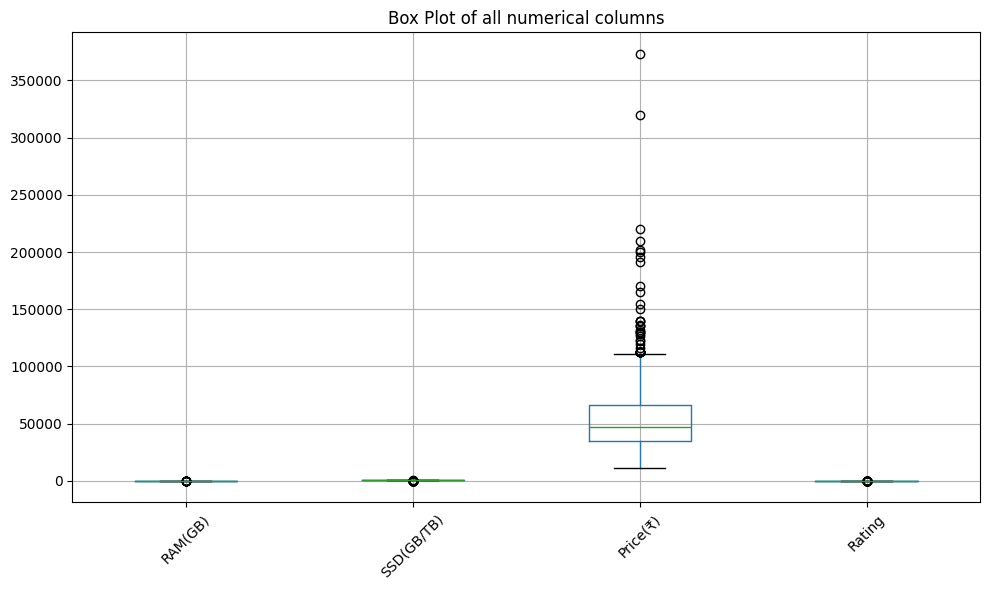

In [29]:
numerical_cols_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
numerical_cols_df.boxplot()
plt.title('Box Plot of all numerical columns')
plt.xticks(rotation = 45)
plt.tight_layout()

In [30]:
def find_outliers(df,col):
    q1,q3 = df[col].quantile([0.25,0.75])
    IQR = q3 - q1
    lower_whisker = q1 - 1.5 * IQR
    upper_whisker = q3 + 1.5 * IQR
    return lower_whisker,upper_whisker
numerical_cols = df.select_dtypes(include = 'number').columns
for col in numerical_cols:
    lower,upper = find_outliers(df,col)
    df[col] = np.clip(df[col], lower, upper)

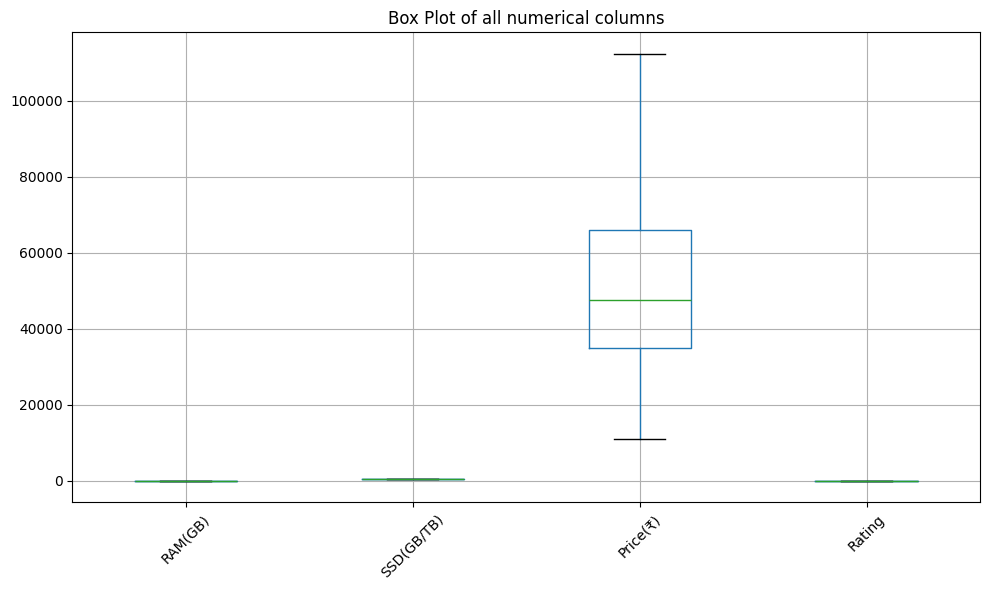

In [157]:
numerical_cols_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
numerical_cols_df.boxplot()
plt.title('Box Plot of all numerical columns')
plt.xticks(rotation = 45)
plt.tight_layout()

In [31]:
df.dtypes

Brand                object
Processor            object
Operating_System     object
RAM(GB)             float64
SSD(GB/TB)          float64
Processor_Gen        object
Price(₹)            float64
Rating              float64
dtype: object

###  Data Analysis and Visualization (EDA)
### Uni-variate Analysis
- Categorical
- Numerical Data

### Bi-variate Analysis/Multivariate 
- Continuous  and Categorical variables (groupby, pivot table)  
- Continuous  to Continuous variable  (correlation plot) 
- Categorical to Categorical variables  (crosstab) 

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
df.head(2)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,75490.0,4.5
1,DELL,Intel Core i7,Windows 11 Home,16.0,512.0,13,65990.0,4.3


### Uni-variate Analysis
### 1)What is the distribution of prices among all laptops?


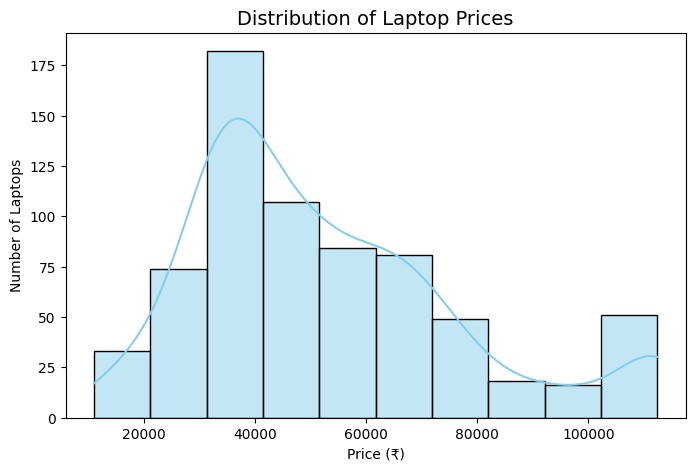

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price(₹)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices', fontsize=14)
plt.xlabel('Price (₹)')
plt.ylabel('Number of Laptops')
plt.show()

### 2)What is the distribution of RAM sizes?

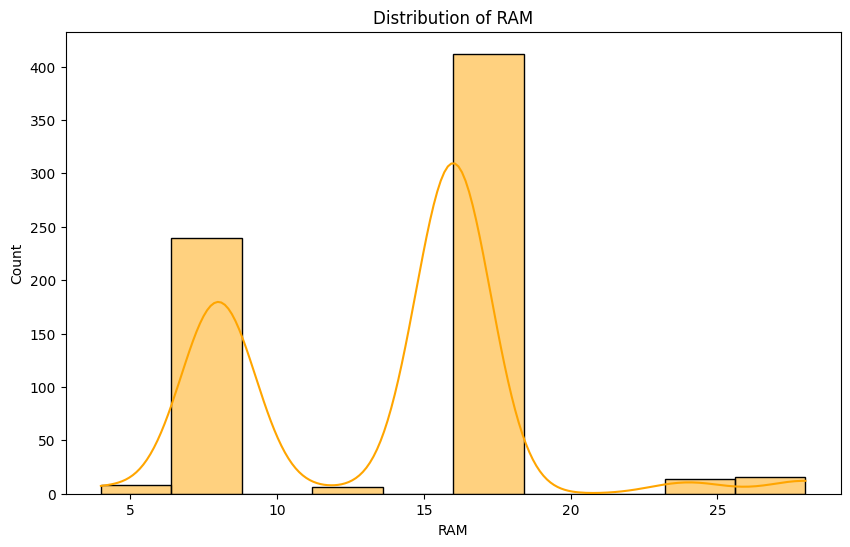

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['RAM(GB)'],bins = 10,kde = True,color = 'orange')
plt.xlabel('RAM')
plt.title('Distribution of RAM')
plt.show()

### 3)Which processor types are most frequent?

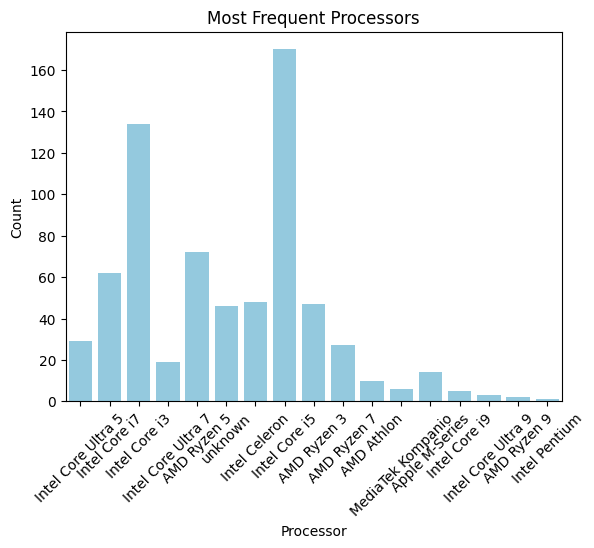

In [39]:
sns.countplot(x='Processor', data=df, color='skyblue')
plt.ylabel('Count')
plt.xlabel('Processor')
plt.title('Most Frequent Processors')
plt.xticks(rotation=45)
plt.show()

### 4)What is the most common Operating System?

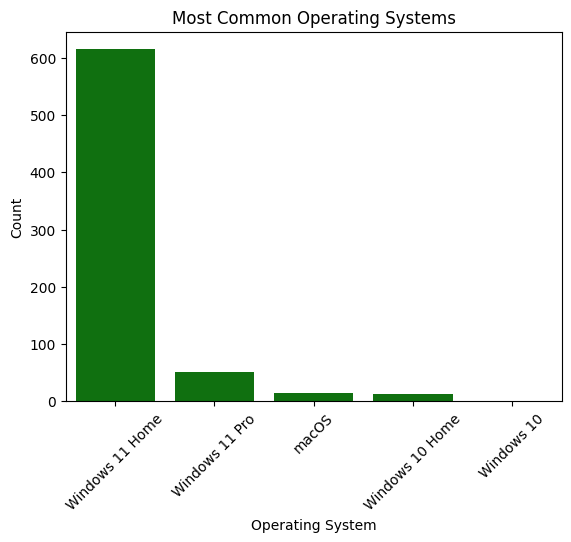

In [40]:
sns.countplot(data=df, x='Operating_System', color='green')
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.title('Most Common Operating Systems')
plt.xticks(rotation = 45)
plt.show()

### Bivariate Analysis (two variables)

### 1)How does price vary by brand?

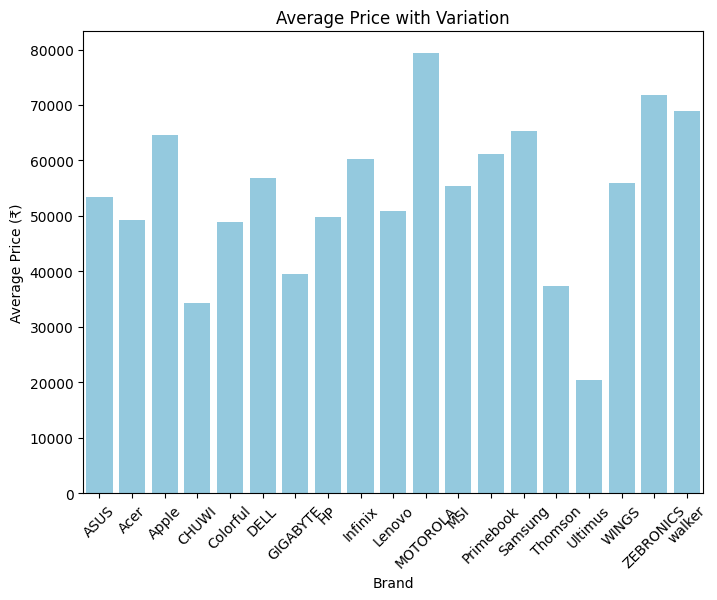

In [41]:
# Group by Brand and calculate average price
dis = df.groupby('Brand', as_index=False)['Price(₹)'].mean()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=dis, x='Brand', y='Price(₹)', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.title('Average Price with Variation')
plt.xticks(rotation=45)
plt.show()


### 2)Does increasing RAM lead to higher laptop prices?

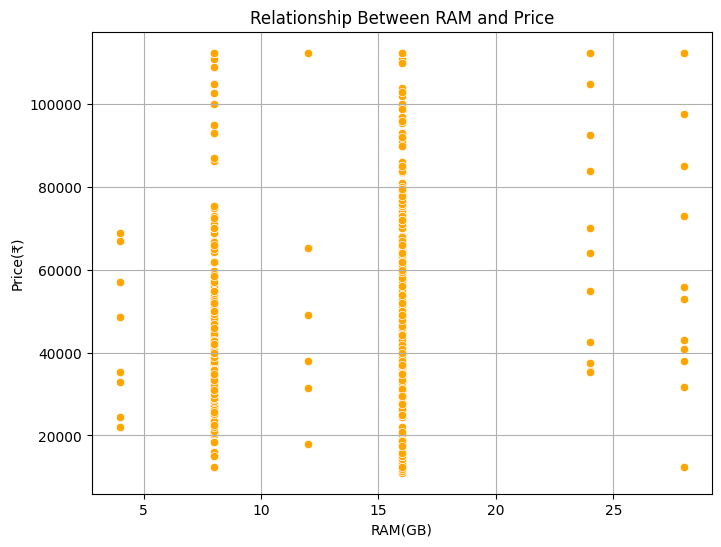

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df,x = 'RAM(GB)',y = 'Price(₹)',color = 'Orange')
plt.xlabel('RAM(GB)')
plt.ylabel('Price(₹)')
plt.title('Relationship Between RAM and Price')
plt.grid(True)
plt.show()

In [59]:
df.head(3)

,Brand,Processor,Operating_System,RAM(GB),SSD(GB/TB),Processor_Gen,Price(₹),Rating
0,DELL,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,75490.0,4.5
1,DELL,Intel Core i7,Windows 11 Home,16.0,512.0,13,65990.0,4.3
2,Samsung,Intel Core Ultra 5,Windows 11 Home,16.0,512.0,13,72140.0,4.2


### 3)Is there a relationship between SSD capacity and price?

C:\Users\areti\AppData\Local\Temp\ipykernel_5808\645967082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = 'SSD(GB/TB)',y = 'Price(₹)',palette='Blues',edgecolor=None,linewidth=0)


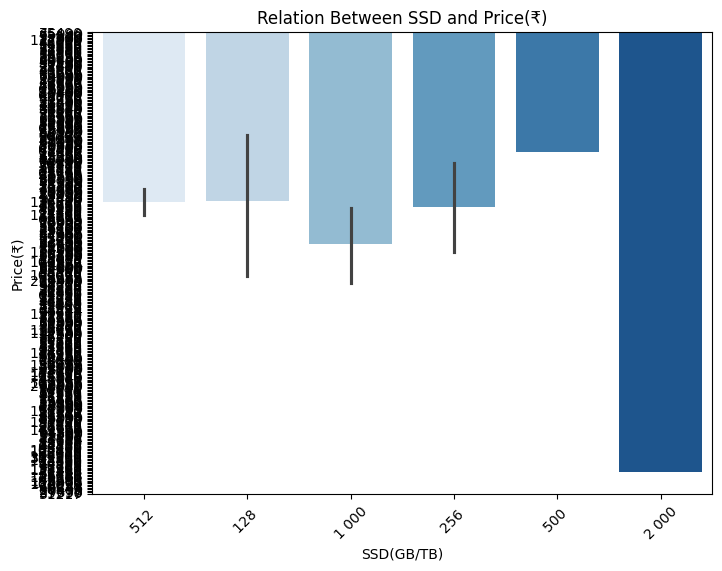

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(data = df,x = 'SSD(GB/TB)',y = 'Price(₹)',palette='Blues',edgecolor=None,linewidth=0)
plt.xlabel('SSD(GB/TB)')
plt.ylabel('Price(₹)')
plt.title('Relation Between SSD and Price(₹)')
plt.xticks(rotation=45)
plt.show()

### 4) Which brands have the highest customer ratings?

In [130]:
rate_data = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
rate_data

Brand
walker       4.400000
Primebook    4.383333
Apple        4.360000
CHUWI        4.333333
Samsung      4.321429
Colorful     4.300000
WINGS        4.300000
ASUS         4.239456
DELL         4.224691
Infinix      4.200000
MOTOROLA     4.200000
Lenovo       4.170175
MSI          4.168182
Acer         4.165909
HP           4.136691
ZEBRONICS    4.133333
GIGABYTE     4.000000
Ultimus      4.000000
Thomson      3.850000
Name: Rating, dtype: float64

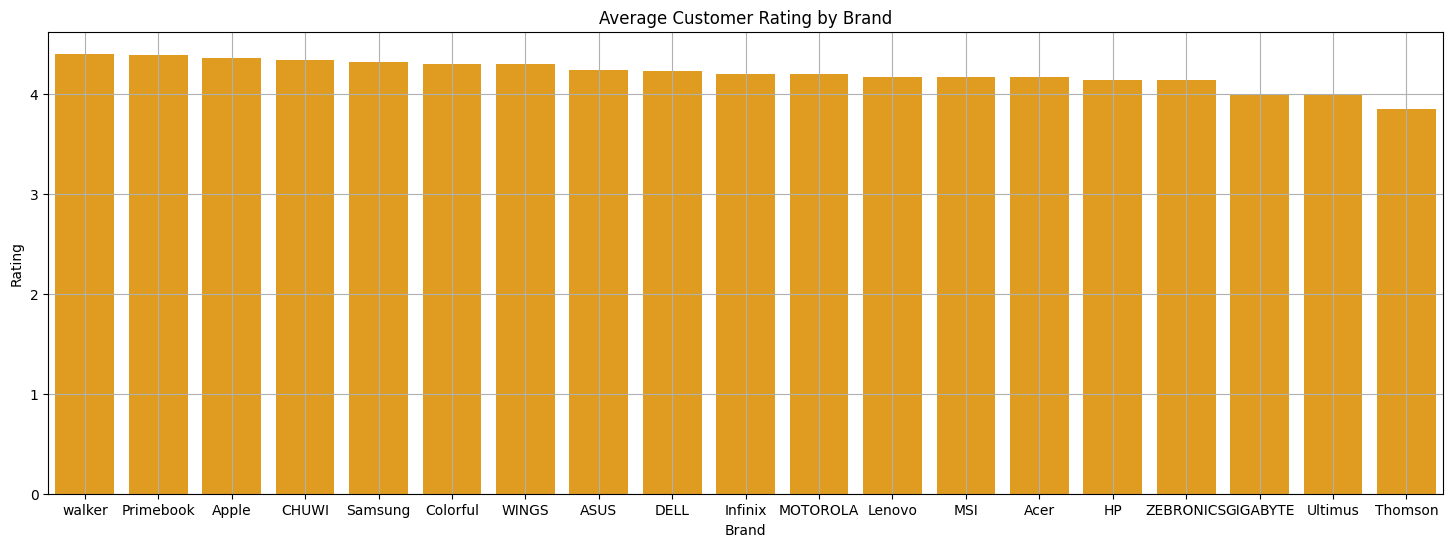

In [158]:
plt.figure(figsize=(18,6))
sns.barplot(rate_data,color = 'orange')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.title('Average Customer Rating by Brand')
plt.grid(True)
plt.show()

### 5) Do laptops with higher processor generation cost more?

In [202]:
df['Processor_Gen'].value_counts()

Processor_Gen
13         503
12         127
11          26
14          24
10           7
7            3
5            2
3rd Gen      1
4            1
8            1
Name: count, dtype: int64

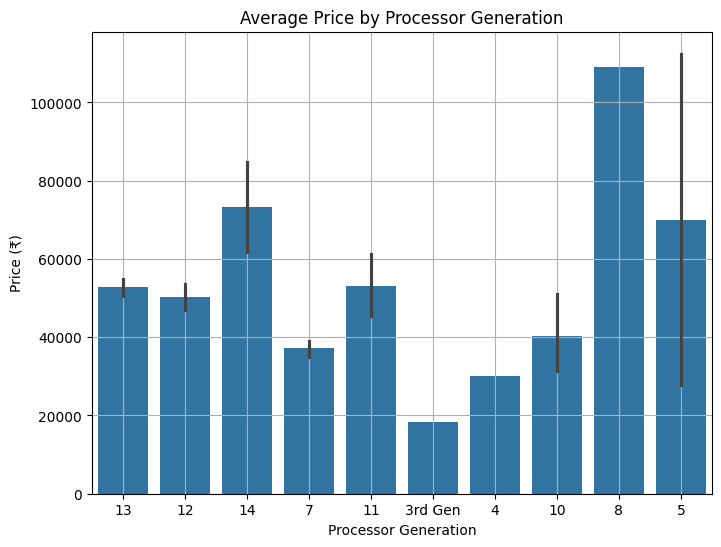

In [174]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Processor_Gen', y='Price(₹)')

plt.title('Average Price by Processor Generation')
plt.xlabel('Processor Generation')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()


### 6)Does processor type (Intel / AMD / Ultra) influence the laptop price?

In [207]:
df.groupby('Processor')['Price(₹)'].mean()

Processor
AMD Athlon             41039.300000
AMD Ryzen 3            43770.063830
AMD Ryzen 5            47349.652778
AMD Ryzen 7            67022.962963
AMD Ryzen 9            33490.000000
Apple M-Series         94971.214286
Intel Celeron          34392.125000
Intel Core Ultra 5     63334.793103
Intel Core Ultra 7     87890.947368
Intel Core Ultra 9    135523.333333
Intel Core i3          43785.402985
Intel Core i5          58527.505882
Intel Core i7          71750.612903
Intel Core i9         109551.400000
Intel Pentium          28190.000000
MediaTek Kompanio      31280.166667
unknown                56636.913043
Name: Price(₹), dtype: float64

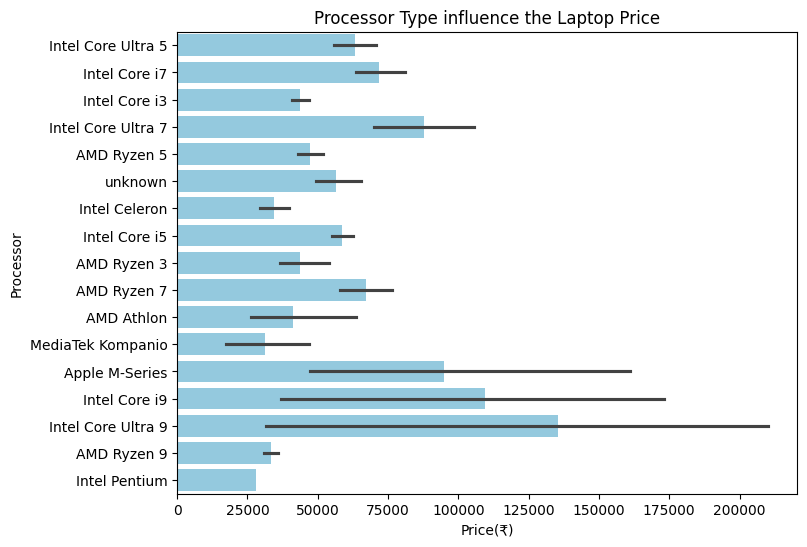

In [217]:
plt.figure(figsize=(8,6))
sns.barplot(data = df , y = 'Processor',x = 'Price(₹)',color = 'skyblue')
plt.ylabel('Processor')
plt.xlabel('Price(₹)')
plt.title('Processor Type influence the Laptop Price')
plt.show()

### Multivariate Analysis Questions (3+ variables)

### 1)How do RAM and Processor Generation together influence price?

In [219]:
df.groupby(['RAM(GB)', 'Processor_Gen'])['Price(₹)'].mean().sort_values()

RAM(GB)  Processor_Gen
8.0      3rd Gen           18399.000000
16.0     5                 27710.000000
8.0      4                 29990.000000
16.0     10                34939.000000
8.0      14                34990.000000
16.0     7                 36940.000000
8.0      7                 37799.000000
4.0      10                40744.500000
32.0     12                40990.000000
8.0      10                41407.000000
12.0     13                41640.000000
24.0     12                42490.000000
8.0      13                43858.266234
4.0      13                45807.500000
8.0      12                46531.035088
16.0     11                48035.750000
         12                54099.390625
8.0      11                55220.888889
16.0     13                57802.116719
12.0     12                57865.000000
24.0     13                64511.900000
16.0     14                72962.052632
32.0     13                81773.636364
8.0      8                108990.000000
24.0     14      

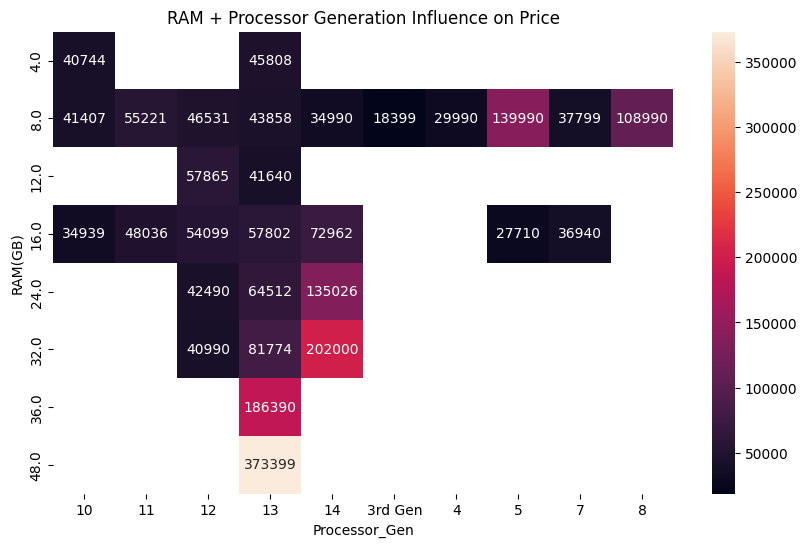

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(values='Price(₹)',
                       index='RAM(GB)',
                       columns='Processor_Gen',
                       aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("RAM + Processor Generation Influence on Price")
plt.show()


### 2)Which brand offers the latest processor generation at the lowest price?

In [225]:
df.groupby(['Brand','Processor_Gen'])['Price(₹)'].mean().sort_values()

Brand      Processor_Gen
HP         3rd Gen           18399.000000
Ultimus    13                18490.000000
           10                22490.000000
Acer       5                 27710.000000
Lenovo     4                 29990.000000
CHUWI      12                34323.333333
Acer       7                 34890.000000
Lenovo     10                35414.500000
Thomson    12                37371.500000
HP         7                 37799.000000
Lenovo     7                 38990.000000
GIGABYTE   13                39494.500000
ASUS       11                40268.400000
HP         10                44524.000000
Lenovo     12                48004.212121
HP         13                48437.743363
Acer       13                48799.723077
Colorful   13                48990.000000
DELL       12                49052.666667
Acer       12                49727.411765
           11                49823.333333
DELL       10                49844.500000
HP         12                49986.857143
Infinix  

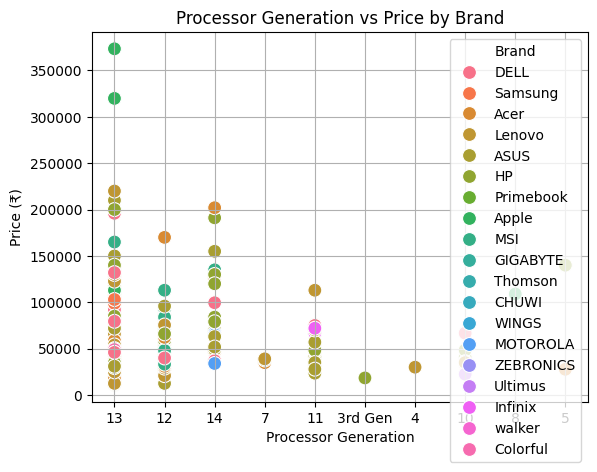

In [228]:
sns.scatterplot(data=df, x='Processor_Gen', y='Price(₹)', hue='Brand', s=100)
plt.title('Processor Generation vs Price by Brand')
plt.xlabel('Processor Generation')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()

### 3)Rating × Price × Brand — Does higher cost mean better reviews?

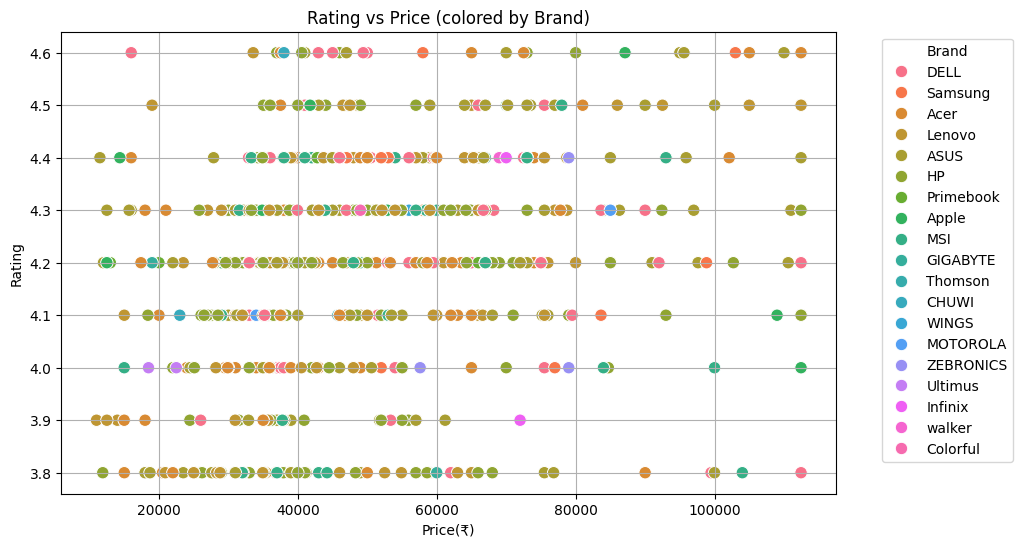

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price(₹)', y='Rating', hue='Brand', s=80)
plt.xlabel('Price(₹)')
plt.ylabel('Rating')
plt.grid(True)
plt.title('Rating vs Price (colored by Brand)')
plt.legend(title='Brand', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()